In [1]:
# brew install graphviz
# pip install graphviz
from graphviz import Digraph

In [2]:
from tensorgrad.engine import Value

In [3]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a grapj
    nodes, edges = set(),set()
    def build(v):
        nodes.add(v)
        for child in v._prev:
            edges.add((child,v))
            build(child)
    build(root)
    return nodes,edges
def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir':'LR'})# LR = left to right
    
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        #for any value in the graph, create a rectangular ('record') node for it
        datastr=""
        gradstr=""
        for da in n.data:
            datastr+= "%s\\n"%da
        for ga in n.grad:
            gradstr+= "%s\\n"%ga
        dot.node(name = uid, label = "{ %s | data\\n %s | grad\\n %s }" % (n.label, datastr, gradstr ), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid +n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)
            
    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
                 
    return dot

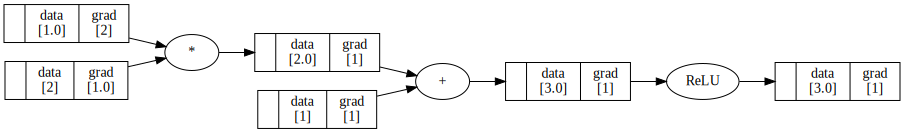

In [4]:
# a very simple example
x = Value([[1.0]])
y = (x * 2 + 1).relu()
y.backward()
draw_dot(y)

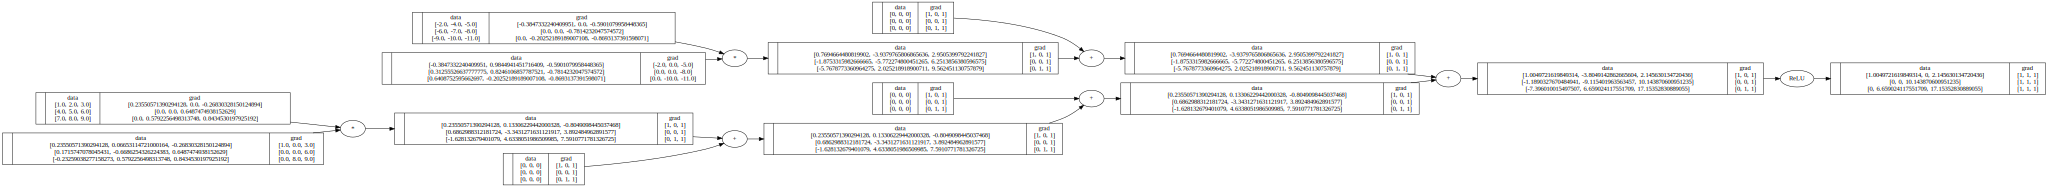

In [5]:
# a simple 2D neuron with 3x3 shape values
import random
from tensorgrad import nn

random.seed(1337)
n = nn.Neuron(2, [3, 3])
x = [Value([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]),
     Value([[-2.0, -4.0, -5.0], [-6.0, -7.0, -8.0], [-9.0, -10.0, -11.0]])]
y = n(x)
y.backward()

dot = draw_dot(y)
dot

In [6]:
dot.render('gout')

'gout.svg'